### File is used for validating output of thermal data stripping from thermal mp4 renders

In [ ]:
import cv2, pytesseract, re, joblib
import numpy as np
import matplotlib.pyplot as plt

def ocr_number(img):
    cfg = r'--psm 7 -c tessedit_char_whitelist=0123456789.-'
    text = pytesseract.image_to_string(img, config=cfg)
    m = re.search(r'-?\d+(?:\.\d+)?', text)
    return float(m.group()) if m else None

cap = cv2.VideoCapture("../../.local_data/midbelt_BW.mp4")
temps = joblib.load("thermal.temps")
if(temps.shape[1]!=3):
    raise IndexError(f"temps file is not loaded correctly.")
ok, frame0 = cap.read()

x1 = 190
y1 = 57
y2 = 240

w1 = 60
h1 = 18

print(frame0[:, :, 0])

plt.imshow(frame0[:, :, 0]>100, cmap='gray')
plt.scatter(w1+x1, y1+h1, s=50, c='blue')
plt.scatter(x1, y1, s=50, c='blue')
plt.scatter(w1+x1, y2+h1, s=50, c='blue')
plt.scatter(x1, y2, s=50, c='blue')
plt.show()


# Define ROIs in (x,y,w,h). Do this once; adjust to your overlay.
ROI_HIGH = (x1, y1, w1, h1)
ROI_LOW  = (x1, y2, w1, h1)

results = []
frame_idx = 0
fps = cap.get(cv2.CAP_PROP_FPS) or 30.0

while True:
    ok, frame = cap.read()
    if not ok: break
    x,y,w,h = ROI_HIGH
    hi_roi = frame[y:y+h, x:x+w]
    x,y,w,h = ROI_LOW
    lo_roi = frame[y:y+h, x:x+w]

    # Preprocess
    def prep(roi):
        g = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        g = cv2.GaussianBlur(g, (3,3), 0)
        g = cv2.threshold(g, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
        return g

    hi_val = ocr_number(prep(hi_roi))
    lo_val = ocr_number(prep(lo_roi))

    t = frame_idx / fps
    results.append((frame_idx, t, hi_val, lo_val))
    if(frame_idx%100==0):
        print(f"frame idx: {frame_idx}")
    frame_idx += 1

cap.release()

In [13]:
l = len(results)

for i in range(l-100, l):
    pass#print(results[i])
    
arr = np.asarray(results)

arr_t = arr[:, [0,2,3]]

for i in range(l-100, l):
    print(arr_t[i])


[8110 58.6 15.2]
[8111 58.6 15.2]
[8112 58.6 15.2]
[8113 58.6 15.2]
[8114 58.6 15.2]
[8115 58.6 15.2]
[8116 58.6 15.2]
[8117 58.6 15.2]
[8118 58.6 15.2]
[8119 58.6 15.2]
[8120 58.6 15.2]
[8121 58.6 15.2]
[8122 58.6 15.2]
[8123 58.6 15.2]
[8124 58.6 15.2]
[8125 58.6 5.27]
[8126 58.6 5.29]
[8127 58.6 5.2]
[8128 58.6 2.0]
[8129 58.6 2.0]
[8130 58.6 2.0]
[8131 58.6 45.2]
[8132 58.6 15.2]
[8133 58.6 45.2]
[8134 58.6 15.2]
[8135 58.6 15.2]
[8136 9.1 15.6]
[8137 9.1 15.6]
[8138 9.1 15.6]
[8139 9.1 15.6]
[8140 9.1 15.6]
[8141 9.1 5.67]
[8142 9.1 9.6]
[8143 9.1 5.6]
[8144 9.1 5.6]
[8145 9.1 5.6]
[8146 9.1 75.65]
[8147 9.1 15.65]
[8148 9.1 9.6]
[8149 9.1 6.0]
[8150 9.1 None]
[8151 9.1 None]
[8152 9.1 56.0]
[8153 9.1 5.6]
[8154 9.1 1556.0]
[8155 9.1 None]
[8156 9.1 None]
[8157 59.1 None]
[8158 9.1 66.0]
[8159 9.1 15.6]
[8160 9.1 15.6]
[8161 9.1 15.6]
[8162 9.1 15.6]
[8163 9.1 15.6]
[8164 9.1 15.6]
[8165 9.1 15.6]
[8166 9.1 15.6]
[8167 58.0 15.2]
[8168 58.0 15.2]
[8169 58.0 15.2]
[8170 58.0 15.2]


[[ 58  74 127 ...  48  49  49]
 [ 55  72 127 ...  48  49  49]
 [ 57  73 135 ...  48  49  49]
 ...
 [ 42  42  39 ...  50  50  50]
 [ 42  42  40 ...  50  49  49]
 [ 41  41  40 ...  51  48  52]]


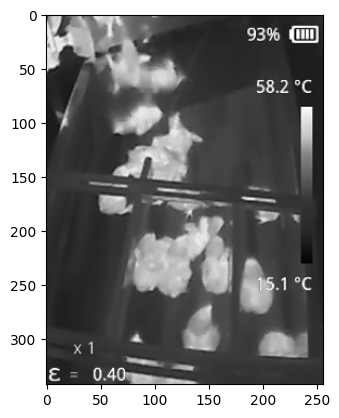

In [7]:
import cv2, pytesseract, re, joblib
import numpy as np
import matplotlib.pyplot as plt

def ocr_number(img):
    cfg = r'--psm 7 -c tessedit_char_whitelist=0123456789.-'
    text = pytesseract.image_to_string(img, config=cfg)
    m = re.search(r'-?\d+(?:\.\d+)?', text)
    return float(m.group()) if m else None

cap = cv2.VideoCapture("../../.local_data/midbelt_BW.mp4")
temps = joblib.load("thermal.temps")
if(temps.shape[1]!=3 and not isinstance(temps, np.ndarray)):
    raise IndexError(f"temps file is not loaded correctly.")
ok, frame0 = cap.read()

m = cv2.cvtColor(frame0, cv2.COLOR_RGB2GRAY)
print(m)

plt.imshow(m,cmap='gray')
plt.show()

results = []
frame_idx = 0
fps = cap.get(cv2.CAP_PROP_FPS) or 30.0

'''
while True:
    ok, frame = cap.read()
    if not ok: break

    plt.imshow(frame)

    t = frame_idx / fps
    if(frame_idx%100==0):
        print(f"frame idx: {frame_idx}")
    frame_idx += 1

'''

cap.release()

In [1]:
import pandas as pd
import joblib

temps = joblib.load("thermal.temps")

#go through all frames of temp data
for m in range(1, temps.shape[0]):
    #go through all values saved in this frame
    for n in range(1,temps.shape[1]):
        #check to see if there are any missing values
        if((temps[m,n]) is None):
            #if so, replace it with last samples value
            temps[m,n]=temps[m-1,n]

    #check to see if low is higher than high, impossible and was a misread
    if(temps[m,2]>temps[m,1]):
        temps[m,2] = temps[m-1,2]

    #check to see if low is higher than high, impossible and was a misread
    if(temps[m,2]>temps[m,1]):
        temps[m,1] = temps[m-1,1]

joblib.dump(temps, "thermal.temps")

['thermal.temps']

0 255
0.0 1.0


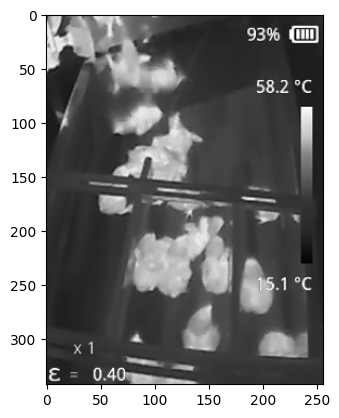

5.7 58.2
5.1 58.199997
5.17 58.199997
15.1 58.199997
15.1 58.199997
15.1 58.199997
15.2 58.600002
15.2 58.600002
2.0 58.6
2.0 58.6
3.0 58.6
3.0 58.6
3.0 58.6
8.0 58.6
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
45.2 58.6
45.2 58.6
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.600002
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.29 58.4
2.0 58.4
2.0 58.4
5.25 58.4
5.25 58.4
5.2 56.4
5.2 56.4
5.2 56.4
15.2 56.4
15.2 56.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.2 58.4
15.4 59.199997
15.4 59.199997
15.4 59.199997
15.49 59.199

In [2]:
import cv2, re, joblib
import numpy as np
import matplotlib.pyplot as plt

def ocr_number(img):
    cfg = r'--psm 7 -c tessedit_char_whitelist=0123456789.-'
    text = pytesseract.image_to_string(img, config=cfg)
    m = re.search(r'-?\d+(?:\.\d+)?', text)
    return float(m.group()) if m else None

cap = cv2.VideoCapture("../../.local_data/midbelt_BW.mp4")
temps = joblib.load("thermal.temps")
if(temps.shape[1]!=3 and not isinstance(temps, np.ndarray)):
    raise IndexError(f"temps file is not loaded correctly.")
ok, frame0 = cap.read()

m = cv2.cvtColor(frame0, cv2.COLOR_RGB2GRAY)
#print(m)

print(np.min(m), np.max(m))

m = m.astype(np.float32) / 255

print(np.min(m), np.max(m))

plt.imshow(m,cmap='gray')
plt.show()

results = []
frame_idx = 0
fps = cap.get(cv2.CAP_PROP_FPS) or 30.0

lo_t = 0
hi_t = 0

frame_cnt = (int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

therm_denorm = []

while True:
    ok, frame = cap.read()
    if not ok: break

    norm_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    norm_frame = norm_frame.astype(np.float32) / 255

    lo_t = temps[frame_idx, 2]
    hi_t = temps[frame_idx, 1]
    df_t = hi_t-lo_t

    if(df_t<0):
        raise ValueError(f"negative hi lo temp difference, impossible. check logic. GOT (hi, lo) as ({hi_t}, {lo_t})")

    norm_frame *= df_t
    norm_frame += lo_t

    #print(lo_t, hi_t)
    print(np.min(norm_frame), np.max(norm_frame))

    cv2.imshow("frame", frame)

    therm_denorm.append(norm_frame)
    
    frame_idx += 1

therm_denorm = np.stack(therm_denorm, axis=0)

cap.release()
cv2.destroyAllWindows()

In [ ]:
for frame in range(therm_denorm.shape[0]):

    loc_frame = therm_denorm[frame]
    loc_frame = cv2.normalize(loc_frame, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    #print(np.min(loc_frame), np.max(loc_frame))
    #print(loc_frame.shape)

    c = cv2.applyColorMap(loc_frame, cv2.COLORMAP_JET)
    plt.imshow(c)
    plt.show()

    cv2.imshow("frame", c)

cv2.destroyAllWindows() 